# ノードやエッジに属性を追加したグラフ
対応する動画：[NetworkXによるネットワーク分析　⑲属性付きグラフの作成と可視化【研究で使うPython #77】](https://youtu.be/mBIwCmyswJs)

動画のプレイリスト：[NetworkXによるネットワーク分析](https://youtube.com/playlist?list=PLw5AEs-T7pLHBRJRinkqTRv7qNO-_P3Rj)

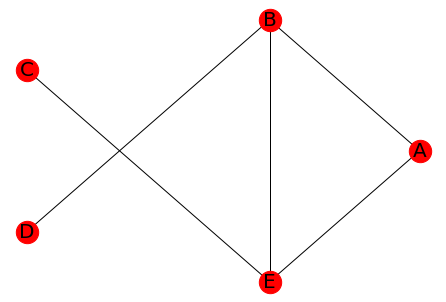

In [1]:
%matplotlib inline
import networkx as nx # NetworkXをインポート
import matplotlib.pyplot as plt

# ネットワーク生成
G = nx.Graph() # 空の無向グラフ生成

nodes = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'E'), ('B', 'D'), ('B', 'E'), ('C', 'E')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='red', node_size=500, font_size=20)
plt.show()

## ノードに属性の追加

In [2]:
G.nodes['A']['性別']='M'
G.nodes['B']['性別']='F'
G.nodes['C']['性別']='M'
G.nodes['D']['性別']='F'
G.nodes['E']['性別']='F'

G.nodes['A']['年齢']=18
G.nodes['B']['年齢']=22
G.nodes['C']['年齢']=19
G.nodes['D']['年齢']=20
G.nodes['E']['年齢']=22

## 追加された属性の表示

In [3]:
for i in G.nodes():
#for i in G.nodes(data=True):
    print(i)

A
B
C
D
E


## エッジに属性の追加

In [4]:
G.edges['A', 'B']['weight']=0.8
G.edges['A', 'E']['weight']=0.1
G.edges['B', 'D']['weight']=1.0
G.edges['B', 'E']['weight']=0.4
G.edges['C', 'E']['weight']=0.3

## 追加された属性の表示

In [5]:
for i in G.edges(data=True):
    print(i)

('A', 'B', {'weight': 0.8})
('A', 'E', {'weight': 0.1})
('B', 'D', {'weight': 1.0})
('B', 'E', {'weight': 0.4})
('C', 'E', {'weight': 0.3})


## ノードやエッジの作成と同時に属性も作成（上と同様）

In [6]:
G = nx.Graph() # 空の無向グラフ生成

# 重み付きグラフの生成
nodes = [('A', {'性別': 'M', '年齢': 18}), ('B', {'性別': 'F', '年齢': 22}), ('C', {'性別': 'M', '年齢': 19}), ('D', {'性別': 'F', '年齢': 20}), ('E', {'性別': 'F', '年齢': 22})]
edges = [('A', 'B', {'weight': 0.8}), ('A', 'E', {'weight': 0.1}), ('B', 'D', {'weight': 1.0}), ('B', 'E', {'weight': 0.4}), ('C', 'E', {'weight': 0.3})]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [7]:
for i in G.nodes(data=True):
    print(i)
    
for i in G.edges(data=True):
    print(i)

('A', {'性別': 'M', '年齢': 18})
('B', {'性別': 'F', '年齢': 22})
('C', {'性別': 'M', '年齢': 19})
('D', {'性別': 'F', '年齢': 20})
('E', {'性別': 'F', '年齢': 22})
('A', 'B', {'weight': 0.8})
('A', 'E', {'weight': 0.1})
('B', 'D', {'weight': 1.0})
('B', 'E', {'weight': 0.4})
('C', 'E', {'weight': 0.3})


## 可視化のためのノードの属性抽出

In [8]:
for n, d in G.nodes(data=True):
    print(n)
    print(d)

A
{'性別': 'M', '年齢': 18}
B
{'性別': 'F', '年齢': 22}
C
{'性別': 'M', '年齢': 19}
D
{'性別': 'F', '年齢': 20}
E
{'性別': 'F', '年齢': 22}


In [9]:
node_labels = {n:(d['性別'], d['年齢']) for n, d in G.nodes(data=True)}
print(node_labels)

{'A': ('M', 18), 'B': ('F', 22), 'C': ('M', 19), 'D': ('F', 20), 'E': ('F', 22)}


## ノードの属性の可視化

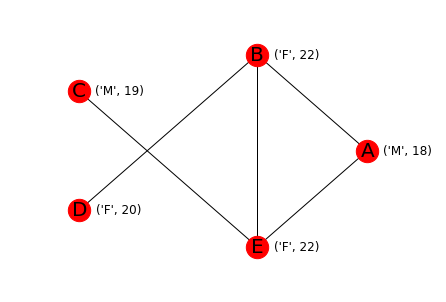

In [10]:
pos=nx.circular_layout(G)

pos_node_attributes={}
for node, (x,y) in pos.items():
    pos_node_attributes[node]=(x+0.25, y)

nx.draw(G, pos=pos, with_labels=True, node_color='red', node_size=500, font_size=20)
nx.draw_networkx_labels(G, pos=pos_node_attributes, labels=node_labels)
plt.margins(0.25)
plt.show()

## 可視化のためのエッジの属性抽出

In [11]:
for u,v,d in G.edges(data=True):
    print(u, v)
    print(d)

A B
{'weight': 0.8}
A E
{'weight': 0.1}
B D
{'weight': 1.0}
B E
{'weight': 0.4}
C E
{'weight': 0.3}


In [12]:
edge_labels = {(u, v):d['weight'] for u,v,d in G.edges(data=True)}
print(edge_labels)

{('A', 'B'): 0.8, ('A', 'E'): 0.1, ('B', 'D'): 1.0, ('B', 'E'): 0.4, ('C', 'E'): 0.3}


## ノードとエッジの属性の可視化

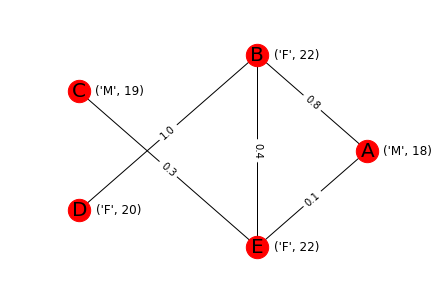

In [13]:
nx.draw(G, pos=pos, with_labels=True, node_color='red', node_size=500, font_size=20)
nx.draw_networkx_labels(G, pos=pos_node_attributes, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, label_pos=0.5)
plt.margins(0.25)
plt.show()